[![](https://miro.medium.com/max/1400/0*d58iZ6esNNcfntQ7)](#)

Source : https://miro.medium.com/max/1400/0*d58iZ6esNNcfntQ7

## What is Customer Churn ?

Customer churn or customer attrition is the phenomenon where customers of a business no longer purchase or interact with the business. A high churn means that higher number of customers no longer want to purchase goods and services from the business.

## What is Churn Rate?

Churn rate is a business metric that calculates the number of customers who leave a product over a given period of time, divided by total remaining customers.

For example, if you start your quarter with 400 customers and end with 380, your churn rate is 5% because you lost 5% of your customers.

In [1]:
# Importing all required libraries  

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from imblearn.combine import SMOTEENN

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_roc_curve

In [2]:
pd.set_option('display.max_columns', None)      # These line is used to display all columns 

sns.set_style('whitegrid')                      # Setting grid for better visualization

In [3]:
# Loading the dataset

data = pd.read_csv('Telco-Customer-Churn.csv')

In [4]:
# Check first 5 rows 

data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Exploratory Data Analysis (EDA)

In [5]:
# Check shape of dataset

shape = data.shape

print('There are {} records & {} features in the dataset.'.format(shape[0], shape[1]))

There are 7043 records & 21 features in the dataset.


In [6]:
# Summary of dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### From the dataset we can see there are 17 categorical features & 4 numerical features but from the summary, we can see there are only 3 numerical features.

In [7]:
# Check type of 'TotalCharges' feature

type(data['TotalCharges'][0])

str

#### The 'TotalCharges' is of object datatype but actually, it should be of float datatype. So we will convert it to float.

In [8]:
# There are blank spaces in 'TotalCharges' so we will first convert it to NaN & then to float

data['TotalCharges'] = np.where(data['TotalCharges']==' ', np.nan, data['TotalCharges'])   # Conveting blank space to NaN

data['TotalCharges'] = data['TotalCharges'].apply(lambda x: float(x))   # Convrting object datatype to float 

In [9]:
# Check Descriptive Stats

data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [10]:
# Check null values

data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
# Replacing null values

median = data['TotalCharges'].median()                           # Get median value of 'TotalCharges' feature

data['TotalCharges'] = np.where(data['TotalCharges'].isnull(), 0, data['TotalCharges'])       # Replace NaN with median

In [12]:
# Check null values after replacing

data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
cat_list = [i for i in data.columns if data[i].dtype == 'O' and i != 'customerID']

for i in cat_list:
    print('\nNumber of unique values in '+ i +' :',data[i].nunique())
    print()
    print('Unique values :', data[i].unique())
    print()
    print('-'*100)


Number of unique values in gender : 2

Unique values : ['Female' 'Male']

----------------------------------------------------------------------------------------------------

Number of unique values in Partner : 2

Unique values : ['Yes' 'No']

----------------------------------------------------------------------------------------------------

Number of unique values in Dependents : 2

Unique values : ['No' 'Yes']

----------------------------------------------------------------------------------------------------

Number of unique values in PhoneService : 2

Unique values : ['No' 'Yes']

----------------------------------------------------------------------------------------------------

Number of unique values in MultipleLines : 3

Unique values : ['No phone service' 'No' 'Yes']

----------------------------------------------------------------------------------------------------

Number of unique values in InternetService : 3

Unique values : ['DSL' 'Fiber optic' 'No']

----------

### Univariate Analysis

Uni means one and variate means variable, so in univariate analysis, there is only one variable. The objective of univariate analysis is to derive the data, define and summarize it, and analyze the pattern present in it. 

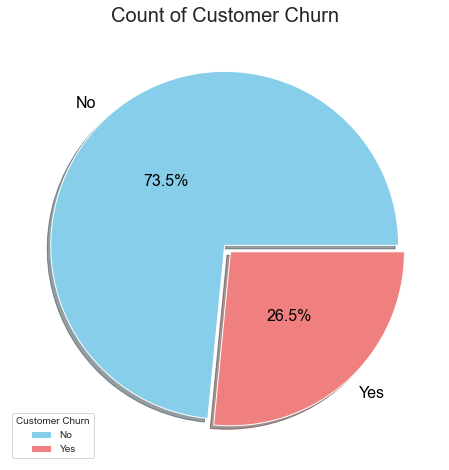

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64


In [14]:
target = data['Churn'].value_counts()/len(data)*100

plt.figure(figsize = (8, 8))
plt.pie(x = target.values, labels = target.keys(), explode = [0, 0.05], autopct='%1.1f%%', shadow = True, textprops = dict(color = 'black', size = 16), colors =  ['skyblue','lightcoral'], pctdistance = 0.5)
plt.legend(title = 'Customer Churn', loc = 'lower left')
plt.title('Count of Customer Churn', fontsize = 20)
plt.show()

print(target)

#### The count of customers who churned is less than customers who don't. Out of 7043 customers, 73% didn't churn & 27% customers churned.

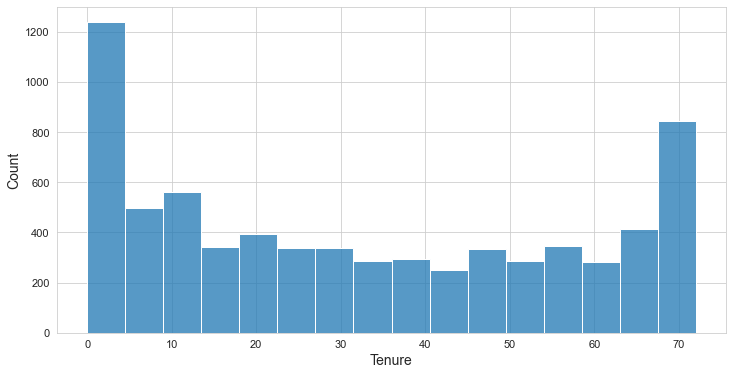

In [15]:
plt.figure(figsize = (12, 6))
sns.histplot(x = data['tenure'])
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)
plt.xlabel('Tenure', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.show()

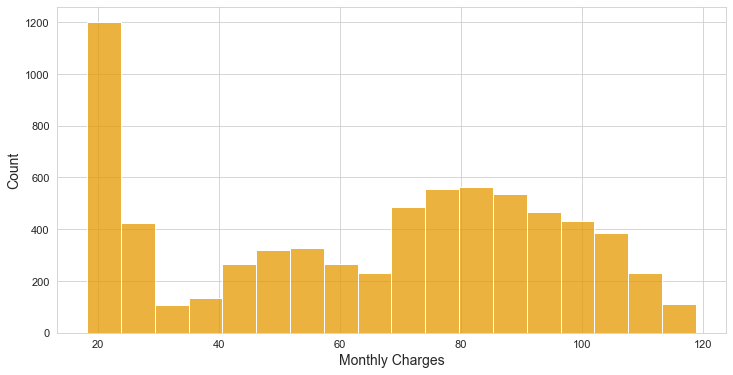

In [16]:
plt.figure(figsize = (12, 6))
sns.histplot(x = data['MonthlyCharges'], color = '#e69900')
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)
plt.xlabel('Monthly Charges', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.show()

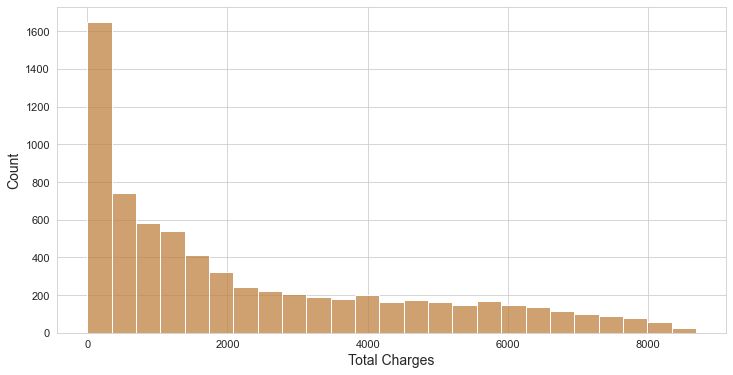

In [17]:
plt.figure(figsize = (12, 6))
sns.histplot(x = data['TotalCharges'], color = '#bf8040')
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)
plt.xlabel('Total Charges', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.show()

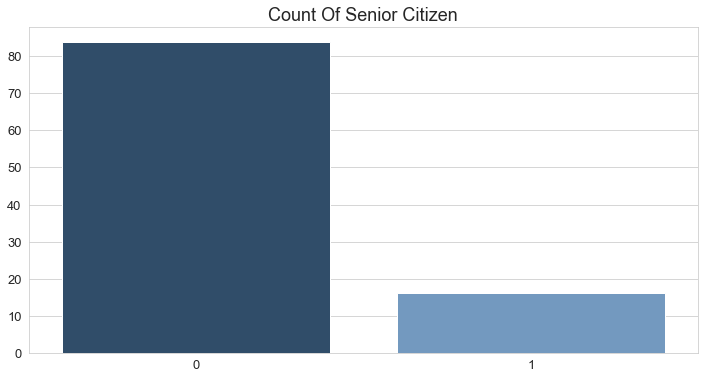


0    83.785319
1    16.214681
Name: SeniorCitizen, dtype: float64


In [18]:
senior = data['SeniorCitizen'].value_counts()/data['SeniorCitizen'].value_counts().sum()*100

plt.figure(figsize = (12, 6))
sns.barplot(data = data, x = senior.keys(), y = senior.values, palette= ['#264d73', '#6699cc'])
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title('Count Of Senior Citizen', fontsize = 18)
plt.show()

print()
print(senior)

#### Around 84% of customers out of 7043 has age less than 65  & only 16% of customers are having age more than 65.

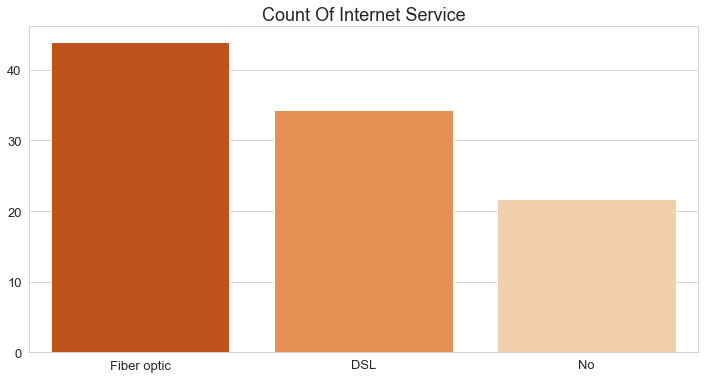


Fiber optic    43.958540
DSL            34.374556
No             21.666903
Name: InternetService, dtype: float64


In [19]:
internet_sevice = data['InternetService'].value_counts()/len(data)*100

plt.figure(figsize = (12, 6))
sns.barplot(data = data, x = internet_sevice.keys(), y = internet_sevice.values, palette = 'Oranges_r')
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title('Count Of Internet Service', fontsize = 18)
plt.show()

print()
print(internet_sevice)

#### Around 44% of customers out of 7043 has internet service as 'Fiber optic' & 34% customers has 'DSL' internet service & remaining 22% customers do not has internet service.

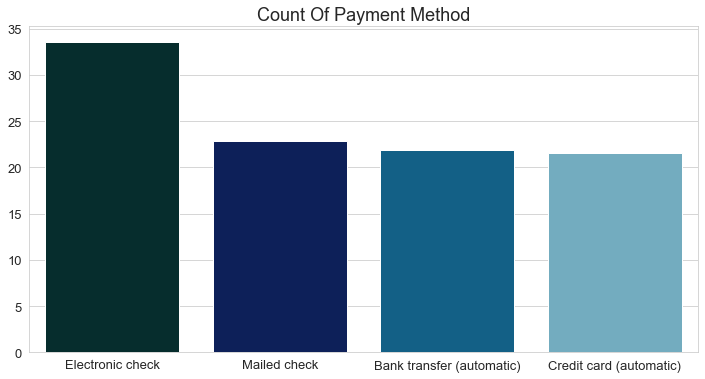


Electronic check             33.579441
Mailed check                 22.887974
Bank transfer (automatic)    21.922476
Credit card (automatic)      21.610109
Name: PaymentMethod, dtype: float64


In [20]:
pay = data['PaymentMethod'].value_counts()/len(data)*100

plt.figure(figsize = (12, 6))
sns.barplot(data = data, x = pay.keys(), y = pay.values, palette = 'ocean')
plt.title('Count Of Payment Method', fontsize = 18)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.show()

print()
print(pay)

#### Out of 7043 customers 34% customers pay via 'Electronic check' & 23% customers pay via 'Mailed check' & remaining 43% customers pay via 'Bank transfer' or 'Credit card'. 

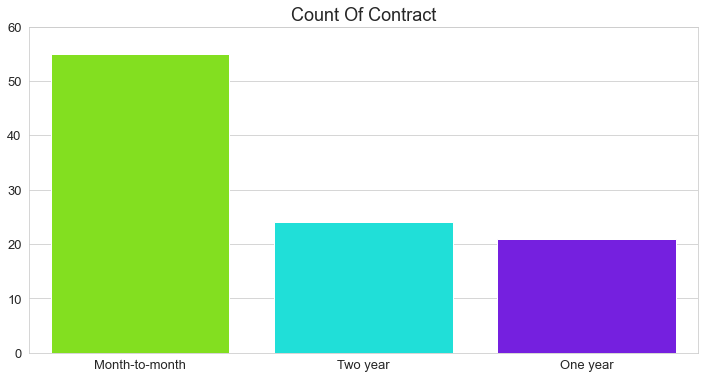


Month-to-month    55.019168
Two year          24.066449
One year          20.914383
Name: Contract, dtype: float64


In [21]:
contract = data['Contract'].value_counts()/len(data)*100

plt.figure(figsize = (12, 6))
sns.barplot(data = data, x = contract.keys(), y = contract.values, palette = 'hsv')
plt.title('Count Of Contract', fontsize = 18)
plt.xticks(fontsize = 13)
plt.yticks(np.arange(0,70,10),fontsize = 13)
plt.show()

print()
print(contract)

#### Out of 7043 customers, 55% of customers has a 'Month-to-Month' contract & 24% customers have 'Two-year' contract & remaining 21% customers has 'One-year' contract. 

### Bivariate Analysis

Bi means two and variate means variable, so here there are two variables. The analysis is related to cause and the relationship between the two variables.

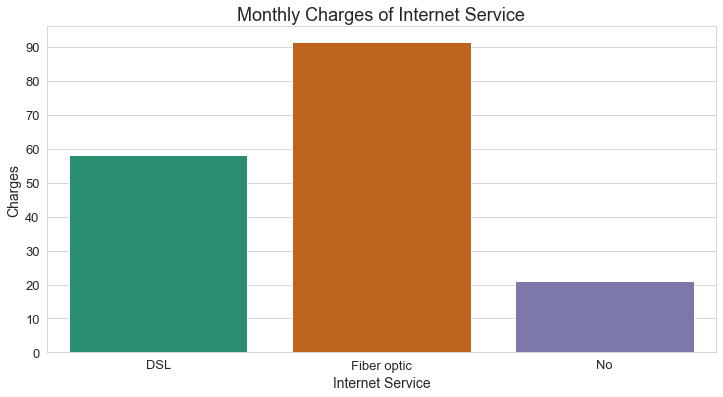


InternetService
DSL            58.102169
Fiber optic    91.500129
No             21.079194
Name: MonthlyCharges, dtype: float64


In [22]:
internet_mon_charges = data.groupby('InternetService')['MonthlyCharges'].mean()

plt.figure(figsize = (12, 6))
sns.barplot(data = data, x = internet_mon_charges.keys(), y = internet_mon_charges.values, palette = 'Dark2')
plt.title('Monthly Charges of Internet Service', fontsize = 18)
plt.xlabel('Internet Service',fontsize = 14)
plt.ylabel('Charges',fontsize = 14)
plt.xticks(fontsize = 13)
plt.yticks(np.arange(0,100,10), fontsize = 13)
plt.show()

print()
print(internet_mon_charges)

#### The average monthly charge for 'Fiber Optic' internet service is more as compared to other services. 

#### The average monthly charge for  'Fiber Optic' internet service is 91.50 & for 'DSL' monthly charge is '58.10'.

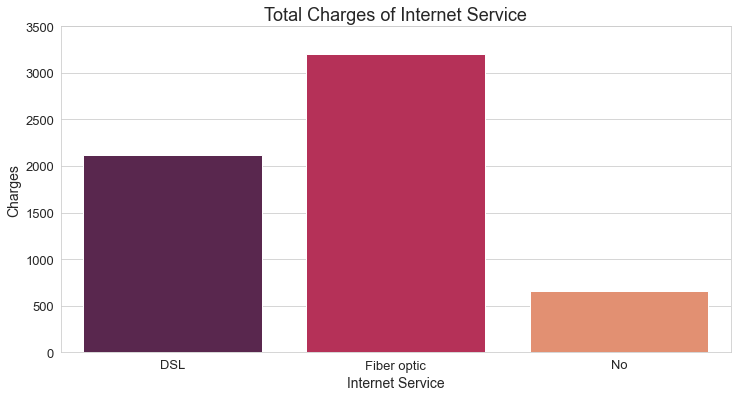


InternetService
DSL            2115.411338
Fiber optic    3205.304570
No              662.604784
Name: TotalCharges, dtype: float64


In [23]:
internet_tot_charges = data.groupby('InternetService')['TotalCharges'].mean()

plt.figure(figsize = (12, 6))
sns.barplot(data = data, x = internet_tot_charges.keys(), y = internet_tot_charges.values, palette = 'rocket')
plt.title('Total Charges of Internet Service', fontsize = 18)
plt.xlabel('Internet Service',fontsize = 14)
plt.ylabel('Charges',fontsize = 14)
plt.xticks(fontsize = 13)
plt.yticks(np.arange(0,4000,500), fontsize = 13)
plt.show()

print()
print(internet_tot_charges)

#### The average monthly charge for 'Fiber Optic' internet service is more as compared to other services. 

#### The average monthly charge for  'Fiber Optic' internet service is '3205.30' & for 'DSL' service monthly charge is ' 2118.29'.

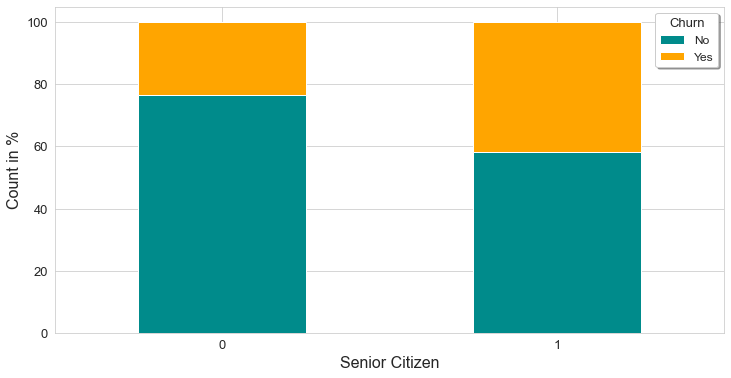

Churn,No,Yes
SeniorCitizen,,
0,76.393832,23.606168
1,58.318739,41.681261


In [24]:
senior_churn = (data.groupby(['SeniorCitizen','Churn'])['customerID'].count()/data.groupby(['SeniorCitizen'])['Churn'].count()*100).unstack()

senior_churn.plot(kind = 'bar', figsize = (12, 6), stacked = True, color = ['darkcyan', 'orange'])
plt.xlabel('Senior Citizen',fontsize = 16)
plt.ylabel('Count in %',fontsize = 16)
plt.xticks(rotation=0, fontsize = 13)
plt.yticks(fontsize = 13)
plt.legend(title = 'Churn', fontsize = 12, title_fontsize = 13, shadow = True)
plt.show()

print()
senior_churn

#### We can see senior citizens churned the most. Out of 1142 senior citizen customers, 42% of customers were churned.

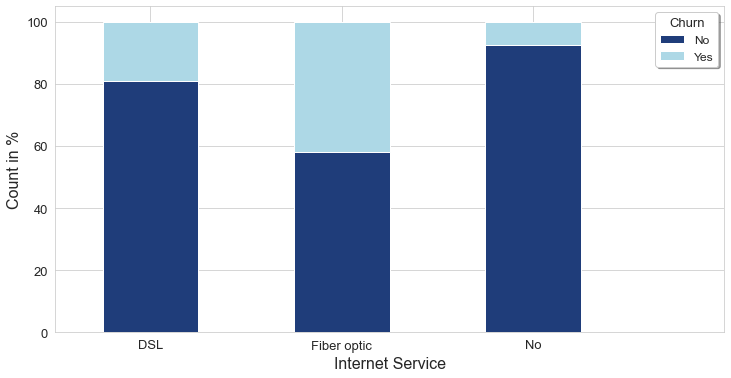

Churn,No,Yes
InternetService,,
DSL,81.040892,18.959108
Fiber optic,58.107235,41.892765
No,92.595020,7.404980


In [25]:
internet_churn = (data.groupby(['InternetService','Churn'])['TotalCharges'].count()/data.groupby(['InternetService'])['Churn'].count()*100).unstack()

#plt.figure(figsize = (12, 6))
internet_churn.plot(kind = 'bar', figsize = (12, 6), stacked = True, color = ['#1f3d7a', 'lightblue'])
plt.xlabel('Internet Service',fontsize = 16)
plt.ylabel('Count in %',fontsize = 16)
plt.xticks(np.arange(0,4), rotation=0, fontsize = 13)
plt.yticks(fontsize = 13)
plt.legend(title = 'Churn', fontsize = 12, title_fontsize = 13, shadow = True)
plt.show()

print()
internet_churn

#### Most customers who left were using 'Fiber Optic' internet service. 42% out of 3096 customers churned who were using 'Fiber Optic' service.

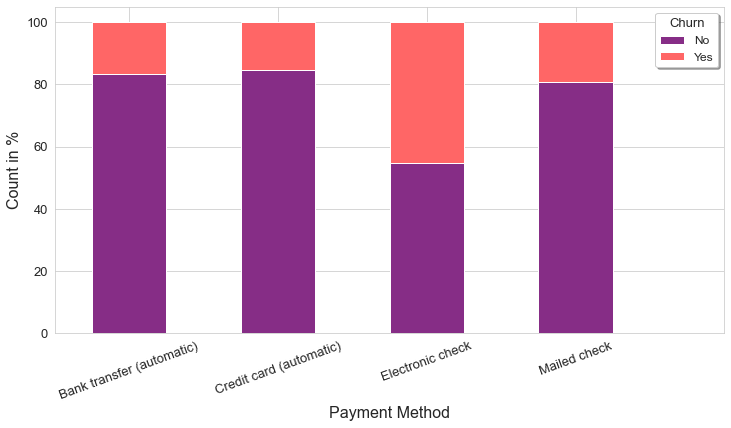

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),83.290155,16.709845
Credit card (automatic),84.756899,15.243101
Electronic check,54.714588,45.285412
Mailed check,80.893300,19.106700


In [26]:
pay_churn = (data.groupby(['PaymentMethod','Churn'])['TotalCharges'].count()/data.groupby(['PaymentMethod'])['Churn'].count()*100).unstack()

#plt.figure(figsize = (12, 6))
pay_churn.plot(kind = 'bar', figsize = (12, 6), stacked = True, color = ['#862d86', '#ff6666'])
plt.xlabel('Payment Method',fontsize = 16)
plt.ylabel('Count in %',fontsize = 16)
plt.xticks(np.arange(0,5), rotation = 20, fontsize = 13)
plt.yticks(fontsize = 13)
plt.legend(title = 'Churn', fontsize = 12, title_fontsize = 13, shadow = True)
plt.show()

print()
pay_churn

#### Most customers who left used to pay via 'Electronic check'. 45% out of 2365 customers churned who used to pay via 'Electronic check'.

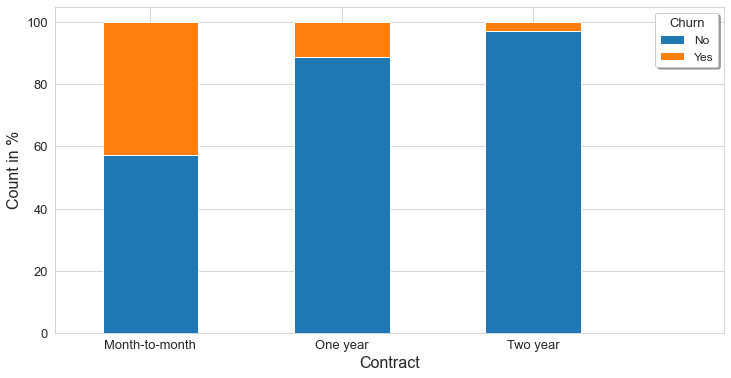

Churn,No,Yes
Contract,,
Month-to-month,57.290323,42.709677
One year,88.730482,11.269518
Two year,97.168142,2.831858


In [27]:
contract_churn = (data.groupby(['Contract','Churn'])['TotalCharges'].count()/data.groupby(['Contract'])['Churn'].count()*100).unstack()

#plt.figure(figsize = (12, 6))
contract_churn.plot(kind = 'bar', figsize = (12, 6), stacked = True)
plt.xlabel('Contract',fontsize = 16)
plt.ylabel('Count in %',fontsize = 16)
plt.xticks(np.arange(0,4), rotation = 0, fontsize = 13)
plt.yticks(fontsize = 13)
plt.legend(title = 'Churn', fontsize = 12, title_fontsize = 13, shadow = True)
plt.show()

print()
contract_churn

#### The customers who churned were more likely to be on a 'Month-to-Month' contract.

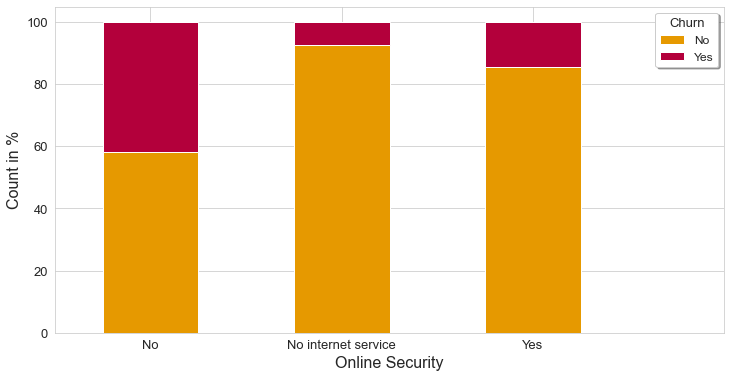

Churn,No,Yes
OnlineSecurity,,
No,58.233276,41.766724
No internet service,92.595020,7.404980
Yes,85.388806,14.611194


In [28]:
online_churn = (data.groupby(['OnlineSecurity','Churn'])['TotalCharges'].count()/data.groupby(['OnlineSecurity'])['Churn'].count()*100).unstack()

#plt.figure(figsize = (12, 6))
online_churn.plot(kind = 'bar', figsize = (12, 6), stacked = True, color = ['#e69900', '#b3003b'])
plt.xlabel('Online Security',fontsize = 16)
plt.ylabel('Count in %',fontsize = 16)
plt.xticks(np.arange(0,4), rotation = 0, fontsize = 13)
plt.yticks(fontsize = 13)
plt.legend(title = 'Churn', fontsize = 12, title_fontsize = 13, shadow = True)
plt.show()

print()
online_churn

#### The customers who were not subscribed to the 'Online Security' service churned the most.

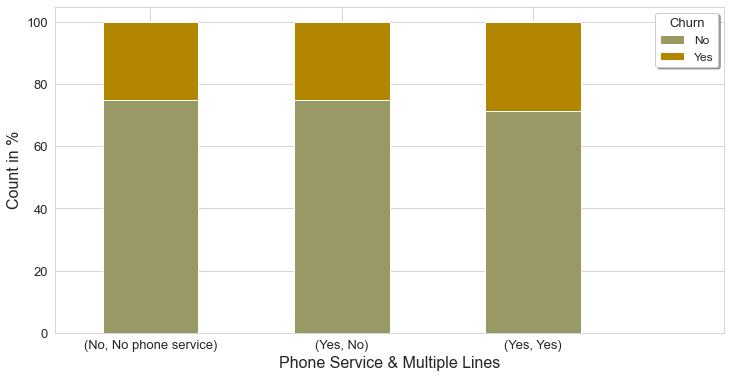

Churn                                 No        Yes
PhoneService MultipleLines                         
No           No phone service  75.073314  24.926686
Yes          No                74.955752  25.044248
             Yes               71.390104  28.609896

In [29]:
phone_churn = (data.groupby(['PhoneService', 'MultipleLines', 'Churn'])['TotalCharges'].count()/data.groupby(['PhoneService', 'MultipleLines'])['Churn'].count()*100).unstack()

#plt.figure(figsize = (12, 6))
phone_churn.plot(kind = 'bar', figsize = (12, 6), stacked = True, color = ['#999966', '#b38600'])
plt.xlabel('Phone Service & Multiple Lines',fontsize = 16)
plt.ylabel('Count in %',fontsize = 16)
plt.xticks(np.arange(0,4), rotation = 0, fontsize = 13)
plt.yticks(fontsize = 13)
plt.legend(title = 'Churn', fontsize = 12, title_fontsize = 13, shadow = True)
plt.show()

print()
phone_churn

#### 25% out of 682 customers who churned were not subscribed to 'Phone service'.

#### 28% out of 2971 customers who churned were subscribed to 'Phone service' & were also subscribed to 'Multiple Line' telephone service.

## Data Pre-processing

In [30]:
# Check first 5 rows 

data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [31]:
# Drop 'customerID' feature as it containes unique ID

data.drop(['customerID'], axis = 1, inplace = True)

In [32]:
# Check first 5 rows after dropping 'customerID' feature

data.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [33]:
# Droping target variable to save the clean data for prediction 

new = data.drop('Churn', axis = 1)

In [34]:
# Saving data to new csv file 

new.to_csv('clean_data.csv', index = False)

In [35]:
# Scaling data

# Create 'StandardScaler' object
scaler = StandardScaler() 

# Fit & Transform scaled data
data[['MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(data[['MonthlyCharges', 'TotalCharges']])

#### From the dataset, we can observe that many features are categorical. So before feeding these data to the model first we have to convert that categorical features to numerical features.

#### There are many ways for converting categorical features to numerical features but here I have used 'One Hot Encoding'

In [36]:
# Manually converting dependent feature to numeric

data["Churn"] = data['Churn'].replace({'No': 0, 'Yes': 1})

In [37]:
# Converting categorical features to numerical features

data = pd.get_dummies(data, drop_first = True)

In [38]:
data.head(5)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,-1.160323,-0.992611,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0,34,-0.259629,-0.172165,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,0,2,-0.362660,-0.958066,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0,45,-0.746535,-0.193672,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,0,2,0.197365,-0.938874,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [39]:
# Splitting Independent & Dependent Fetaures 

X = data.drop('Churn', axis = 1)
y = data['Churn']

In [41]:
# Creating SMOTE object
smn = SMOTEENN(random_state = 5)

# Creating sample data
X, y = smn.fit_resample(X, y)

In [42]:
print('Shape of oversampled training data :', X.shape)

print('Number of loyal customers :', len(y[y == 0]))

print('Number of churned customers :', len(y[y == 1]))

Shape of oversampled training data : (6736, 30)
Number of loyal customers : 2634
Number of churned customers : 4102


In [43]:
# Splitting dataset for training & testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)

In [44]:
print('Shape of training data :', X_train.shape)

print('\nShape of testing data :', X_test.shape)

Shape of training data : (5388, 30)

Shape of testing data : (1348, 30)


## Model Building

### 1) Logistic Regression

In [45]:
# Create a Logistic Regresssion object
log = LogisticRegression(solver = 'newton-cg')

# Train the model
log.fit(X_train, y_train)

# Predict on test data
log_pred = log.predict(X_test)

print('Test Accuracy: {} %'.format(log.score(X_test, y_test).round(3)*100))

Test Accuracy: 92.7 %


In [46]:
print('Confusion Matrix:\n')
print(confusion_matrix(y_test, log_pred))

Confusion Matrix:

[[459  64]
 [ 34 791]]


In [47]:
print(classification_report(y_test, log_pred))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90       523
           1       0.93      0.96      0.94       825

    accuracy                           0.93      1348
   macro avg       0.93      0.92      0.92      1348
weighted avg       0.93      0.93      0.93      1348



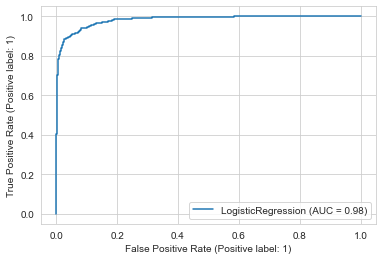

In [48]:
plot_roc_curve(log, X_test, y_test)  
plt.show()

### 2) KNN (K-Nearest Neighbour)

In [49]:
# Create a KNN object
knn = KNeighborsClassifier()

# Train the model
knn.fit(X_train, y_train)

# Predict on test data
knn_pred = knn.predict(X_test)

print('Test Accuracy: {} %'.format(knn.score(X_test, y_test).round(3)*100))

Test Accuracy: 94.3 %


In [50]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, knn_pred))

Confusion Matrix:
[[456  67]
 [ 10 815]]


In [51]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92       523
           1       0.92      0.99      0.95       825

    accuracy                           0.94      1348
   macro avg       0.95      0.93      0.94      1348
weighted avg       0.95      0.94      0.94      1348



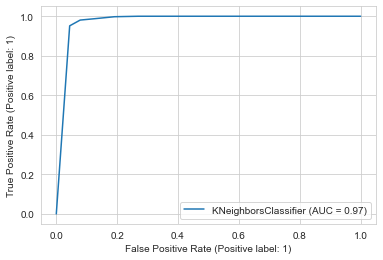

In [52]:
plot_roc_curve(knn, X_test, y_test)  
plt.show()

### 3) SVM (Support Vector Machine)

In [53]:
# Create a SVM object
svc = SVC()

# Train the model
svc.fit(X_train, y_train)

# Predict on test data
svc_pred = svc.predict(X_test)

print('Test Accuracy: {} %'.format(svc.score(X_test, y_test).round(3)*100))

Test Accuracy: 90.4 %


In [54]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, svc_pred))

Confusion Matrix:
[[436  87]
 [ 42 783]]


In [55]:
print(classification_report(y_test, svc_pred))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87       523
           1       0.90      0.95      0.92       825

    accuracy                           0.90      1348
   macro avg       0.91      0.89      0.90      1348
weighted avg       0.90      0.90      0.90      1348



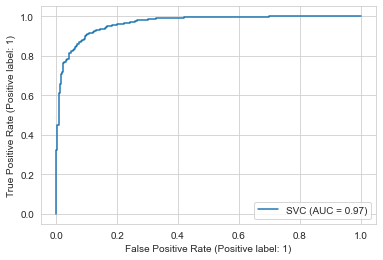

In [56]:
plot_roc_curve(svc, X_test, y_test)  
plt.show()

### 4) Decision Tree

In [57]:
# Create a decision tree object
tree = DecisionTreeClassifier(criterion='gini', max_depth=6, min_samples_leaf=8)

# Train the model
tree.fit(X_train, y_train)

# Predict on test data
tree_pred = tree.predict(X_test)

print('Test Accuracy: {} %'.format(tree.score(X_test, y_test).round(3)*100))

Test Accuracy: 92.80000000000001 %


In [58]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, tree_pred))

Confusion Matrix:
[[462  61]
 [ 36 789]]


In [59]:
print(classification_report(y_test, tree_pred))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90       523
           1       0.93      0.96      0.94       825

    accuracy                           0.93      1348
   macro avg       0.93      0.92      0.92      1348
weighted avg       0.93      0.93      0.93      1348



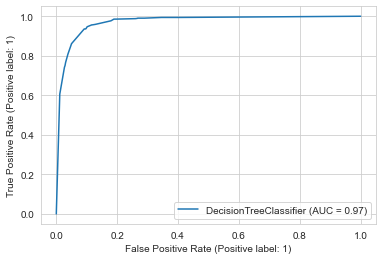

In [60]:
plot_roc_curve(tree, X_test, y_test)  
plt.show()

### 5) Random Forest 

In [61]:
# Create a random forest object
randm = RandomForestClassifier()

# Train the model
randm.fit(X_train, y_train)

# Predict on test data
randm_pred = randm.predict(X_test)

print('Test Accuracy: {} %'.format(randm.score(X_test, y_test).round(3)*100))

Test Accuracy: 95.39999999999999 %


In [62]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, randm_pred))

Confusion Matrix:
[[477  46]
 [ 16 809]]


In [63]:
print(classification_report(y_test, randm_pred))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94       523
           1       0.95      0.98      0.96       825

    accuracy                           0.95      1348
   macro avg       0.96      0.95      0.95      1348
weighted avg       0.95      0.95      0.95      1348



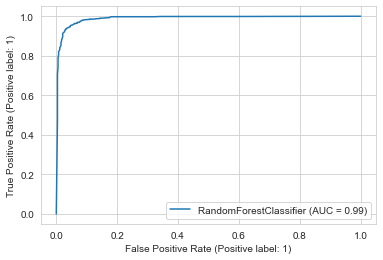

In [64]:
plot_roc_curve(randm, X_test, y_test)  
plt.show()

### Hyperparameter Tuning

In [65]:
# Different parameter for tuning

params = {'n_estimators': [i for i in range(100, 1100, 100)],
         'max_depth': [i for i in range(5, 105, 10)],
         'max_features': ['auto', 'sqrt'],
         }

In [66]:
randmcv = RandomizedSearchCV(randm, params, random_state = 2, n_jobs = -1)

# Train the model
randmcv.fit(X_train, y_train)

print(randmcv.best_score_)
print(randmcv.best_params_)

0.9606527442579968
{'n_estimators': 600, 'max_features': 'auto', 'max_depth': 45}


In [67]:
# Create a random forest object with hyperparameters
randm_hy = RandomForestClassifier(n_estimators = 600, max_features = 'auto', max_depth = 45)

# Train the model
randm_hy.fit(X_train, y_train)

# Predict on test data
randm_hy_pred = randm_hy.predict(X_test)

print('Test Accuracy: {} %'.format(randm_hy.score(X_test, y_test).round(3)*100))

Test Accuracy: 95.3 %


In [68]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, randm_hy_pred))

Confusion Matrix:
[[475  48]
 [ 16 809]]


### Cross Validation

In [69]:
score = cross_val_score(randm_hy, X, y, cv = 10)

In [70]:
print('The average accuracy of the model is'  + "\033[1m" + ' {} %'.format((score.mean().round(3))*100) + "\033[0m")

The average accuracy of the model is 96.1 %


### Saving model

In [71]:
import pickle

In [72]:
# file = open('rf_model.pkl', 'wb')

# pickle.dump(randm_hy, file)
# file.close()